# Top Hits of 2019 (Spotify)

***
### Table Column Info:

1. Track.Name: Name of the Track
2. Artist.Name:Name of the Artist
3. Genre: the genre of the track
4. Beats.Per.Minute: The tempo of the song.
5. Energy: The energy of a song - the higher the value, the more energtic song
6. Danceability: The higher the value, the easier it is to dance to this song.
7. Loudness..dB..: The higher the value, the louder the song.
8. Liveness: The higher the value, the more likely the song is a live recording.
9. Valence. : The higher the value, the more positive mood for the song.
10. Length. : The duration of the song.
11. Acousticness.. : The higher the value the more acoustic the song is.
12. Speechiness. : The higher the value the more spoken word the song contains.
13. Popularity :The higher the value the more popular the song is.


### Question:
- What are the features that contribute to song popularity?
---

# 1. Import Modules 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
import cufflinks as cf
import chart_studio.plotly

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
cf.go_offline()

In [127]:
sns.set_style('darkgrid')
sns.set_color_codes("pastel")

In [24]:
spotify = pd.read_csv('top50.csv', encoding = "ISO-8859-1", index_col=0)

In [176]:
spotify.head(10)

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
1,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
2,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
3,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
4,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
5,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
6,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
7,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
8,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
9,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


# 2. Data Cleaning

In [29]:
spotify.columns = [cols.replace('.', '') for cols in spotify.columns]

In [36]:
spotify = spotify.sort_values(by = 'Popularity', ascending =False).reset_index(drop = True)

In [37]:
spotify.head()

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
1,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
2,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
3,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
4,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92


In [38]:
spotify.describe()

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [32]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
TrackName         50 non-null object
ArtistName        50 non-null object
Genre             50 non-null object
BeatsPerMinute    50 non-null int64
Energy            50 non-null int64
Danceability      50 non-null int64
LoudnessdB        50 non-null int64
Liveness          50 non-null int64
Valence           50 non-null int64
Length            50 non-null int64
Acousticness      50 non-null int64
Speechiness       50 non-null int64
Popularity        50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


---
# 3. EDA
### 3a. Numerical Data Analysis

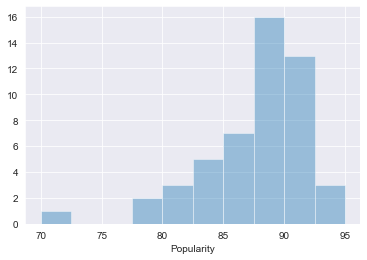

In [128]:
# target variable: popularity 
sns.distplot(spotify['Popularity'], kde = False, bins = 10)

- top 50 songs have popularity score of around 87.5 - 92.5.

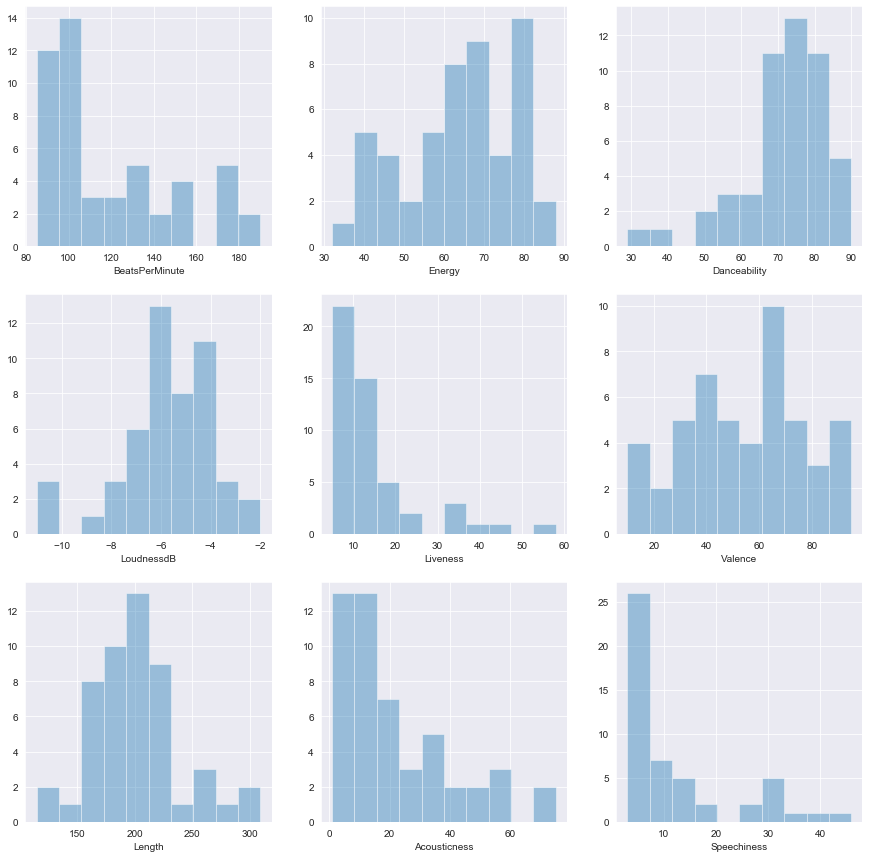

In [129]:
# distribution of other features

x_cols = ['BeatsPerMinute', 'Energy','Danceability', 'LoudnessdB', 'Liveness', 'Valence', 'Length','Acousticness', 
          'Speechiness']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
for i, x_col in enumerate(x_cols):
    sns.distplot( spotify[x_col], ax=axes[i//3,i%3], kde = False, bins = 10)
    axes[i//3,i%3].set_xlabel(x_col) 

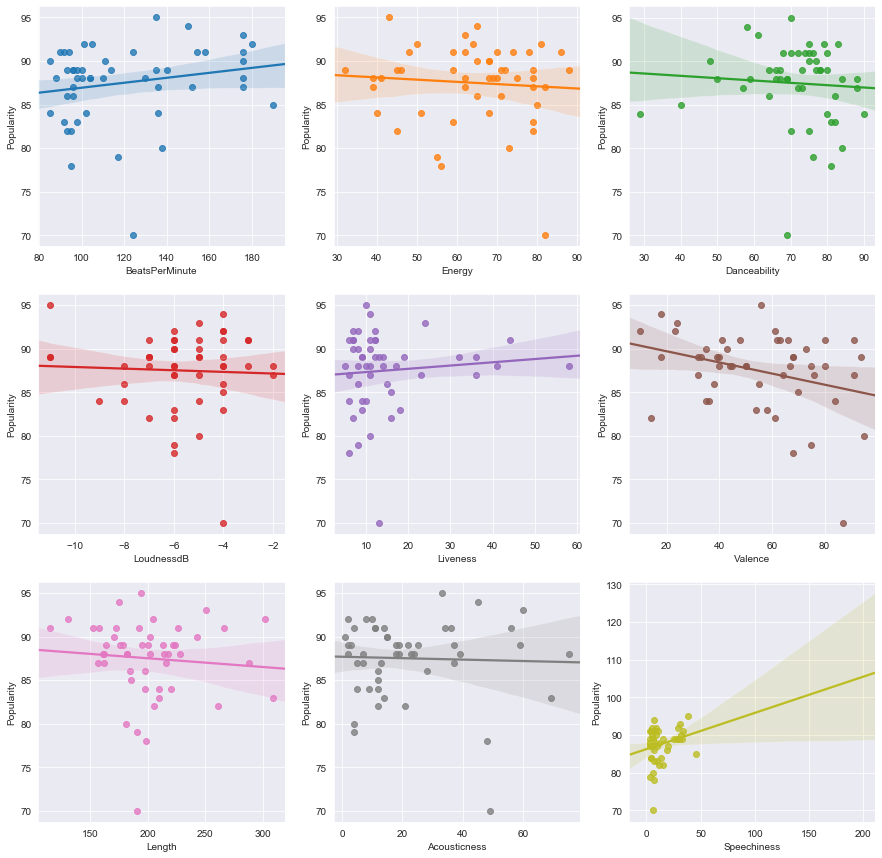

In [121]:
# How does features relate to popularity

x_cols = ['BeatsPerMinute', 'Energy','Danceability', 'LoudnessdB', 'Liveness', 'Valence', 'Length','Acousticness', 
          'Speechiness']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
for i, x_col in enumerate(x_cols):
    sns.regplot( x = x_col,  y = 'Popularity', ax=axes[i//3,i%3], data = spotify)
    axes[i//3,i%3].set_xlabel(x_col) 

- Popular songs tend to have higher `BeatsPerMinute`, `speechiness` and **lower** `valence`.

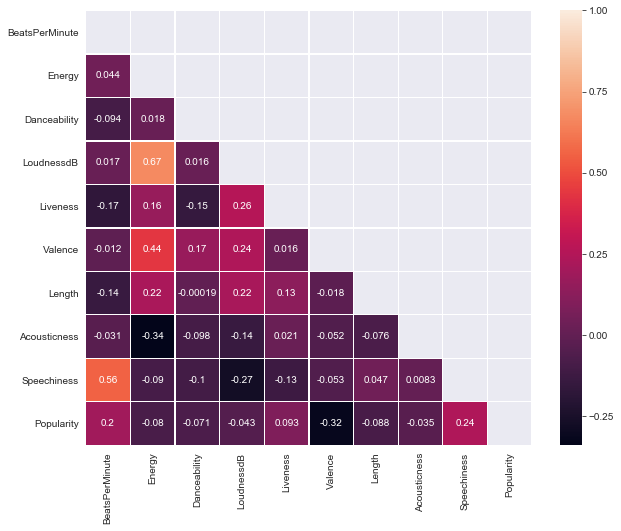

In [95]:
# correlation heatmap between X features and popularity

fig = plt.figure(figsize = (10,8))

mask = np.zeros_like(spotify.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(spotify.corr(), annot = True,linewidths = 0.3, mask = mask)

- `BeatsPerMinute` co-related to `Speechiness`.
- `Energy` co-related to `LoudnessB`, `Valence` (happiness!).

### 3b. Categorical Analysis

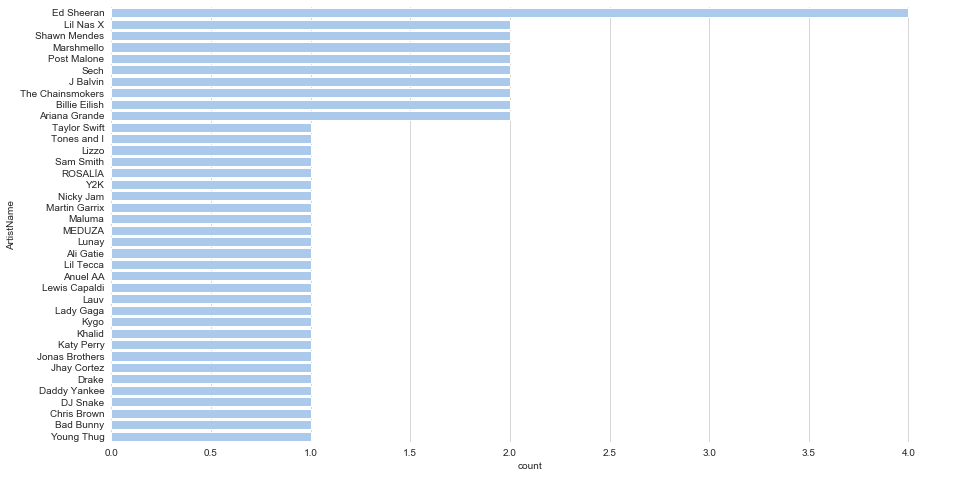

In [182]:
# Artist Popularity:
fig = plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
artist = spotify.groupby('ArtistName').size().reset_index(name = 'count')
artist = artist.sort_values(by = 'count', ascending =False)
sns.barplot(y = 'ArtistName',x="count", data=artist,  color="b")
sns.despine(left=True, bottom=True)

- Ed Sheeren is one of the most popular artist in 2019! Unforuntely, categorisation by artist names cant tell us much sinec most artist only has one popular songs of 2019. 

In [190]:
# Genre Popularity:

spotify['Genre'].unique()

array(['electropop', 'dfw rap', 'reggaeton', 'canadian hip hop',
       'reggaeton flow', 'trap music', 'panamanian pop', 'country rap',
       'pop house', 'escape room', 'latin', 'dance pop', 'pop',
       'big room', 'atl hip hop', 'brostep', 'edm', 'r&b en espanol',
       'australian pop', 'boy band', 'canadian pop'], dtype=object)

In [207]:
# template: music_genre = {'parent genre': 'sub_genre'}, genres with 1 parent genre is classified under others
music_genre = {'electronic' : ['electropop','trap music','pop house', 'big room', 'brostep' 'edm'],
               'hip hop/rap': ['canadian hip hop','atl hip hop','reggaeton','reggaeton flow','dfw rap','country rap'],
               'pop': ['pop','panamanian pop', 'canadian pop', 'australian pop', 'dance pop', 'boy band'],
               'others': ['escape room', 'latin','r&b en espanol']
              }


['pop']

In [169]:
# Genre Popularity:
import plotly.graph_objects as go

artist = spotify.groupby('Genre').size().reset_index(name = 'count')
artist = artist.sort_values(by = 'count', ascending =False)

values = artist['count'].tolist()
labels = artist['Genre'].tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(textposition='inside', textinfo='value+label', title_text = 'Genre Segmentation')
fig.show()

- pop songs seems to be popular amongst listeners with dance pop being the most popular.

In [246]:
# Add song lyrics to song
import lyricsgenius

def get_lyrics(track, artist):
    genius = lyricsgenius.Genius('JMeAY-RxmFqumj22ZNZia1gxfoSzffgPuYPf5T9Zbo9XuKbQ6AcuuDhS3eDO0bts')
    song = genius.search_song(track, artist)
    if song is not None:
        lyrics = song.lyrics
    else:
        lyrics = 'None'
    return lyrics

spotify['lyrics'] = spotify.apply(lambda row: (get_lyrics(row['TrackName'], row['ArtistName'])), axis = 1)

Searching for "bad guy" by Billie Eilish...
Done.
Searching for "Goodbyes (Feat. Young Thug)" by Post Malone...
Done.
Searching for "Callaita" by Bad Bunny...
Done.
Searching for "Money In The Grave (Drake ft. Rick Ross)" by Drake...
Done.
Searching for "China" by Anuel AA...
Done.
Searching for "Ransom" by Lil Tecca...
Done.
Searching for "Otro Trago" by Sech...
Done.
Searching for "Panini" by Lil Nas X...
Done.
Searching for "Piece Of Your Heart" by MEDUZA...
Done.
Searching for "Truth Hurts" by Lizzo...
Done.
Searching for "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone...
Done.
Searching for "Con Calma" by Daddy Yankee...
Done.
Searching for "Soltera - Remix" by Lunay...
Done.
Searching for "You Need To Calm Down" by Taylor Swift...
Done.
Searching for "How Do You Sleep?" by Sam Smith...
Done.
Searching for "LA CANCIÓN" by J Balvin...
Done.
Searching for "Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)" by Martin Garrix...
Done.
Searching for "Never Re

In [293]:
# clean lyrics

import re
new = spotify['lyrics'].iloc[0].replace('\n', ' ',)
new = re.sub(r'\[.*?\]', '', new)
# new = re.sub(r'[^a-zA-Z0-9 ]', '', new)
new = new.lower().split()
new = set(new)
new

SyntaxError: invalid syntax (<ipython-input-293-6d4f2cc16ed0>, line 6)

In [ ]:
def pre_preprocessing(lyrics):